In [4]:
import psycopg2
import pandas as pd
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="healthdb",
                                           user = "postgres",
                                           password = "root",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

# Q1 : Find the division/district/year/month wise sales_price joining fact table and respective dimension table

In [9]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT t.year, SUM (f.sales_price) FROM public.fact_sales f "\
"JOIN public.time t ON f.time_key = t.time_key GROUP BY t.year ORDER BY t.year ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[(2018, Decimal('6707240')),
 (2019, Decimal('63360130')),
 (2020, Decimal('17086680'))]

In [10]:
df_q1 = pd.DataFrame(res,columns = ['year', 'sales_price'])
df_q1

,year,sales_price
0,2018,6707240
1,2019,63360130
2,2020,17086680


In [11]:
def changetype(x):
    x['sales_price'] = x['sales_price'].astype('float64')
changetype(df_q1)
df_q1.dtypes

year             int64
sales_price    float64
dtype: object

<Axes: xlabel='year'>

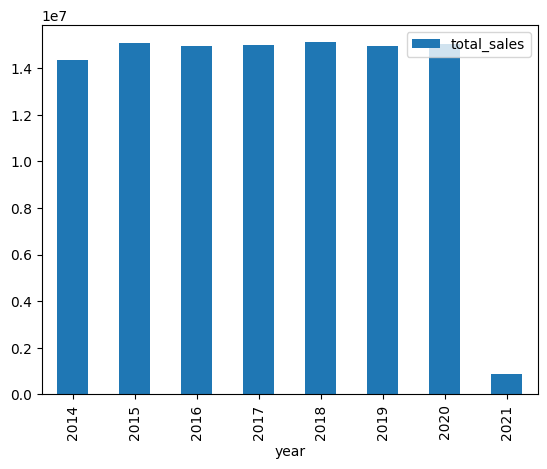

In [33]:
df_q1 = df_q1.set_index(['year'])
df_q1.plot.bar(y='total_sales')

Connection to DB established!


<Axes: ylabel='sales_price'>

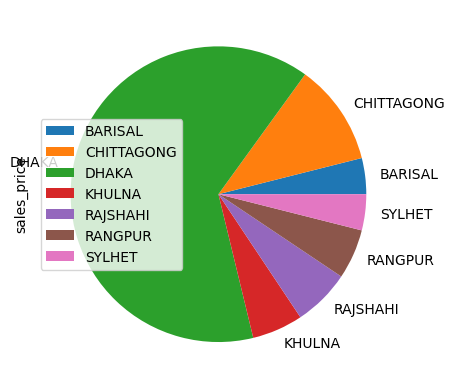

In [13]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT g.division, SUM(f.sales_price)  FROM public.fact_sales f "\
"JOIN public.geography g ON f.geo_key = g.geo_key GROUP BY g.division ORDER BY g.division ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q2 = pd.DataFrame(res,columns = ['division', 'sales_price'])
def changetype(x):
    x['sales_price'] = x['sales_price'].astype('float64')
changetype(df_q2)
df_q2.dtypes

df_q2 = df_q2.set_index(['division'])
df_q2.plot.pie(y='sales_price')

# Q2: Find the lab/test wise total sales_price joining fact table and respective dimension table 

Connection to DB established!


<Axes: ylabel='total_sales'>

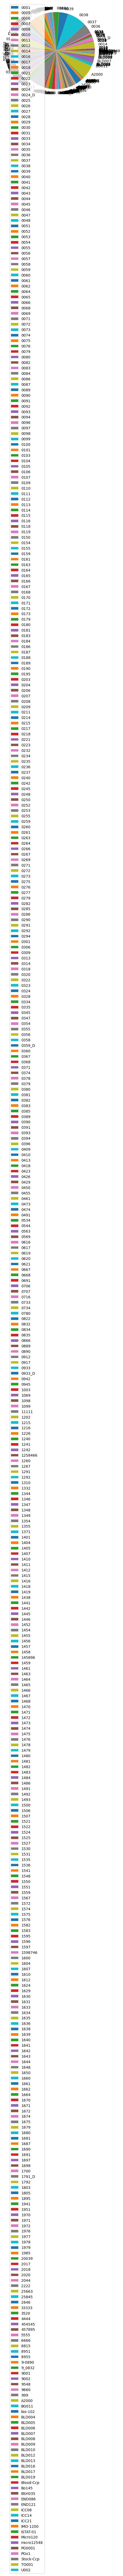

In [8]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT t.test_code, t.test_name, SUM(f.sales_price)  FROM public.fact_sales f "\
" JOIN public.test t ON f.test_key = t.test_key GROUP BY (t.test_code, t.test_name) ORDER BY t.test_code ASC "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q3 = pd.DataFrame(res,columns = ['test_code', 'test_name', 'total_sales'])
df_q3
def changetype(x):
    x['total_sales'] = x['total_sales'].astype('float64')
changetype(df_q3)

df_q3 = df_q3.set_index(['test_code'])
df_q3.plot.pie(y='total_sales')

# Q3: Total tests in Biochemistry lab

In [11]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT DISTINCT COUNT(f.test_key)  FROM public.fact_sales f "\
" JOIN public.lab l ON f.lab_key = l.lab_key WHERE l.lab_name = 'Biochemistry' "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[(43206,)]

# Q4: Total tests in 2019

In [12]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT DISTINCT COUNT(f.test_key)  FROM public.fact_sales f "\
" JOIN public.time t ON f.time_key = t.time_key WHERE t.year = '2019' "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[(68223,)]

# Q5: Total tests in Biochemistry Lab in 2019

In [46]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT DISTINCT COUNT(f.test_key) FROM public.fact_table f "\
" JOIN ecomdb_star_schema.store_dim s ON f.store_key = s.store_key "\
" JOIN ecomdb_star_schema.time_dim t ON f.time_key = t.time_key "\
" WHERE s.district = 'BARISAL' AND t.year = '2015' "
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

Connection to DB established!


[(Decimal('415748.75'),)]

# Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [85]:
con = PostgresConnection().getConnection()
select_stmt = " SELECT * FROM "\
" ( SELECT i.supplier, i.item_name, SUM(f.total_price) AS quantity_sales, "\
" RANK() OVER (PARTITION BY i.supplier ORDER BY SUM(f.total_price) DESC) AS rank "\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" GROUP BY (i.item_key, i.supplier) "\
" ORDER BY i.supplier ASC, quantity_sales DESC )"\
" AS ranked_sales WHERE rank <= 3"
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q5 = pd.DataFrame(res,columns = ['supplier', 'item_name' , 'quantity_sales', 'rank'])
df_q5

Connection to DB established!


,supplier,item_name,quantity_sales,rank
0,BIGSO AB,K Cups – Starbuck's Pike Place,995456.0,1
1,BIGSO AB,Red Bull Sugar Free 8.4 oz,933720.0,2
2,BIGSO AB,Red Bull 8.4 oz,929240.0,3
3,Bolsius Boxmeer,Honey Packets,1012995.0,1
4,Bolsius Boxmeer,Monster Original Green 16 oz,920880.0,2
5,Bolsius Boxmeer,M&M Peanut Candy 1.7 oz,773360.0,3
6,"CHERRY GROUP CO.,LTD",Tejava Unsweetened Black Tea 16.9oz,656212.0,1
7,"CHERRY GROUP CO.,LTD",Topo Chico 20oz plastic,554592.0,2
8,"CHERRY GROUP CO.,LTD",Wonderful Pistachios (in shell),515988.0,3
9,CHROMADURLIN S.A.S,Monster Zero Ultra 16 oz,912160.0,1


# Q7: What products have been sold through card or mobile since X days?
### input: X = 5 days
### output: [item1, item2, item3, ...........]

In [39]:
x = int(input('input X:'))
con = PostgresConnection().getConnection()
select_stmt = " SELECT DISTINCT i.item_name"\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.trans_dim t ON f.payment_key = t.payment_key "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" JOIN ecomdb_star_schema.time_dim s ON f.time_key = s.time_key "\
" WHERE (t.trans_type = 'card' OR t.trans_type = 'mobile') "\
" AND s.t_date BETWEEN (CURRENT_DATE - INTERVAL '%s day') AND CURRENT_DATE "\
" GROUP BY (i.item_key) "
cur = con.cursor()
cur.execute(select_stmt, [x])
res = cur.fetchall()
cur.close()
res

df_q6 = pd.DataFrame(res,columns = ['item_name'])
df_q6

input X:1400
Connection to DB established!


,item_name
0,100% Juice Box Variety 6.75 oz
1,A&W Root Beer - 12 oz cans
2,A&W Root Beer Diet - 12 oz cans
3,Advil 2 pill packets
4,All Purpose Cleaner 409 Spray
...,...
254,Welch's 100% Juice Variety10 oz
255,Wint O Green LifeSavers Sugar Free
256,Wonderful Pistachios (in shell)
257,Yoplait Original Yogurt Variety Pack


# Q8: What season(quarter) is the worst for each product item? As example,
### item1-> q1
### item2-> q2

In [41]:
con = PostgresConnection().getConnection()
select_stmt = " SELECT * FROM "\
" ( SELECT i.item_name, s.quarter, "\
" RANK() OVER (PARTITION BY i.item_key ORDER BY SUM(f.quantity) DESC) AS rank "\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" JOIN ecomdb_star_schema.time_dim s ON f.time_key = s.time_key "\
" GROUP BY (i.item_key, s.quarter) "\
" ORDER BY i.item_name ASC )"\
" AS ranked_sales WHERE rank = 4"
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q7 = pd.DataFrame(res,columns = ['item_name' , 'quarter', 'rank'])
df_q7

Connection to DB established!


,item_name,quarter,rank
0,100% Juice Box Variety 6.75 oz,Q1,4
1,A&W Root Beer - 12 oz cans,Q2,4
2,A&W Root Beer Diet - 12 oz cans,Q4,4
3,Advil 2 pill packets,Q1,4
4,All Purpose Cleaner 409 Spray,Q1,4
...,...,...,...
259,Welch's 100% Juice Variety10 oz,Q2,4
260,Wint O Green LifeSavers Sugar Free,Q1,4
261,Wonderful Pistachios (in shell),Q1,4
262,Yoplait Original Yogurt Variety Pack,Q1,4


# Q9: Break down the total sales of items geographically (division-wise).

 ###    item1-> division1->total_sales

 ###    item1-> division2->total_sales

In [43]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT i.item_name, s.division, SUM(f.total_price) "\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" JOIN ecomdb_star_schema.store_dim s ON f.store_key = s.store_key "\
" GROUP BY (i.item_key, s.division) "\
" ORDER BY i.item_name ASC , s.division ASC"
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q7 = pd.DataFrame(res,columns = ['item_name' , 'division', 'total_sales'])
df_q7

Connection to DB established!


,item_name,division,total_sales
0,100% Juice Box Variety 6.75 oz,BARISAL,23790.0
1,100% Juice Box Variety 6.75 oz,CHITTAGONG,64950.0
2,100% Juice Box Variety 6.75 oz,DHAKA,141195.0
3,100% Juice Box Variety 6.75 oz,KHULNA,37755.0
4,100% Juice Box Variety 6.75 oz,RAJSHAHI,38730.0
...,...,...,...
1843,Zoo Animal Cookies/Crackers,DHAKA,118286.0
1844,Zoo Animal Cookies/Crackers,KHULNA,35434.0
1845,Zoo Animal Cookies/Crackers,RAJSHAHI,37100.0
1846,Zoo Animal Cookies/Crackers,RANGPUR,25186.0


# Q10: What are the average sales of products sales per store monthly?
####  s1->M1-> avg_sales
####  s1-> M2 -> avg_sales

In [63]:
con = PostgresConnection().getConnection()
select_stmt = "SELECT item_name, AVG(monthly_total_sales) FROM("\
" SELECT i.item_name AS item_name, SUM(f.total_price) as monthly_total_sales"\
" FROM ecomdb_star_schema.fact_table f "\
" JOIN ecomdb_star_schema.item_dim i ON f.item_key = i.item_key "\
" JOIN ecomdb_star_schema.time_dim s ON f.time_key = s.time_key "\
" GROUP BY (i.item_name, s.month) "\
" ORDER BY i.item_name ASC)"\
" AS monthly_sales GROUP BY (item_name)"
cur = con.cursor()
cur.execute(select_stmt)
res = cur.fetchall()
cur.close()
res

df_q7 = pd.DataFrame(res,columns = ['item_name' , 'avg_sales'])
df_q7

Connection to DB established!


,item_name,avg_sales
0,100% Juice Box Variety 6.75 oz,29281.250000000000
1,A&W Root Beer - 12 oz cans,22638.708333333333
2,A&W Root Beer Diet - 12 oz cans,13039.875000000000
3,Advil 2 pill packets,26980.333333333333
4,All Purpose Cleaner 409 Spray,33531.000000000000
...,...,...
254,Welch's 100% Juice Variety10 oz,31815.500000000000
255,Wint O Green LifeSavers Sugar Free,30225.333333333333
256,Wonderful Pistachios (in shell),42999.000000000000
257,Yoplait Original Yogurt Variety Pack,22432.000000000000


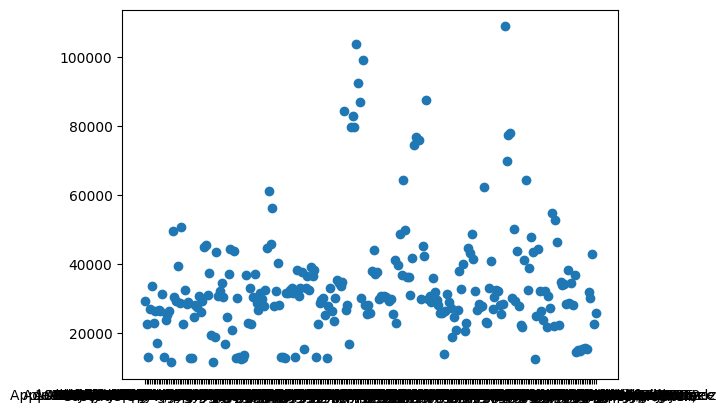

In [67]:
plt.scatter(df_q7['item_name'], df_q7['avg_sales'])
plt.show()